In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA LOAD

In [3]:
df = pd.read_csv("synthetic_hr_attrition_dataset.csv")
df.head()

,EmployeeID,Age,Gender,Department,JobRole,MonthlyIncome,OverTime,JobSatisfaction,DistanceFromHome,YearsAtCompany,Attrition
0,1,50,Female,Finance,Sales Executive,18206,No,3,2,12,No
1,2,36,Male,R&D,Financial Analyst,4378,Yes,2,11,0,No
2,3,29,Male,R&D,Technical Lead,4519,Yes,1,12,9,No
3,4,42,Male,Finance,Research Scientist,10935,Yes,2,28,2,Yes
4,5,40,Male,R&D,Software Developer,9093,No,3,18,3,No


Information about the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Gender            1000 non-null   object
 3   Department        1000 non-null   object
 4   JobRole           1000 non-null   object
 5   MonthlyIncome     1000 non-null   int64 
 6   OverTime          1000 non-null   object
 7   JobSatisfaction   1000 non-null   int64 
 8   DistanceFromHome  1000 non-null   int64 
 9   YearsAtCompany    1000 non-null   int64 
 10  Attrition         1000 non-null   object
dtypes: int64(6), object(5)
memory usage: 86.1+ KB


Columns present in dataset

In [5]:
df.columns

Index(['EmployeeID', 'Age', 'Gender', 'Department', 'JobRole', 'MonthlyIncome',
       'OverTime', 'JobSatisfaction', 'DistanceFromHome', 'YearsAtCompany',
       'Attrition'],
      dtype='object')

Checking any dulication of rows prersent in dataset

In [6]:
df.duplicated().any()

np.False_

ANALYSIS

1. What is the overall attrition rate in the company?

In [124]:
attrition_rate = df['Attrition'].value_counts()
attrition_rate

Attrition
No     794
Yes    206
Name: count, dtype: int64

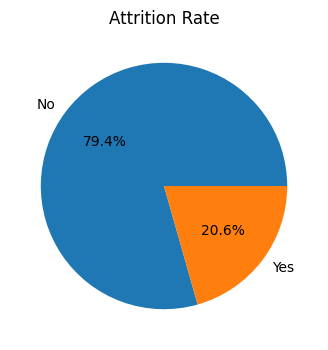

In [130]:
plt.figure(figsize=(4,4))
plt.pie(attrition_rate,labels = df['Attrition'].unique(),autopct="%.1f%%")
plt.title("Attrition Rate")
plt.show()

2. What is the attrition rate by department?

In [125]:
df.groupby(['Department'])['Attrition'].value_counts().unstack()

Attrition,No,Yes
Department,,
Finance,186,37
HR,130,39
IT,165,44
R&D,161,47
Sales,152,39


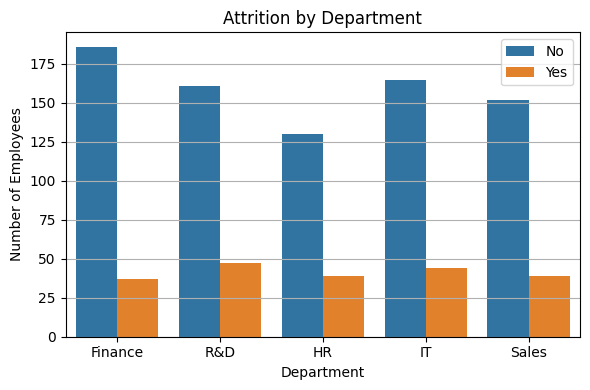

In [160]:
plt.figure(figsize=(6,4))
sns.countplot(df,x='Department',hue = 'Attrition')
plt.title("Attrition by Department",fontsize = 12)
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.legend(loc = 'upper right')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

3. Are employees working overtime more likely to leave?

In [14]:
df.groupby(['OverTime'])['Attrition'].value_counts().unstack()

Attrition,No,Yes
OverTime,,
No,541,129
Yes,253,77


Text(0.5, 1.0, 'Overtime work on Attrition')

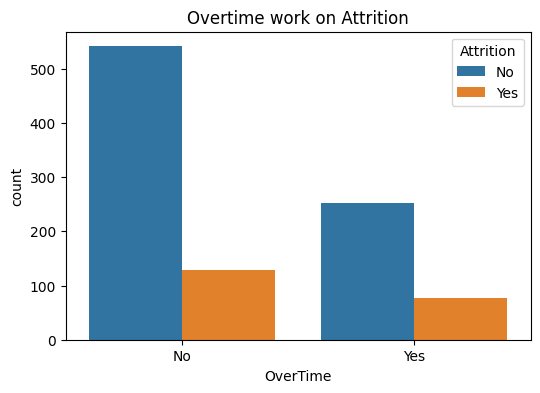

In [147]:
plt.figure(figsize=(6,4))
sns.countplot(df,x = 'OverTime',hue = 'Attrition')
plt.title('Overtime work on Attrition')

4. What is the distribution of monthly income among employees who left vs stayed?

In [27]:
df.groupby('Attrition').agg({'MonthlyIncome':'mean'})

,MonthlyIncome
Attrition,
No,11611.573048
Yes,11041.101942


Text(0.5, 1.0, 'Monthly Income of employee based on attrition')

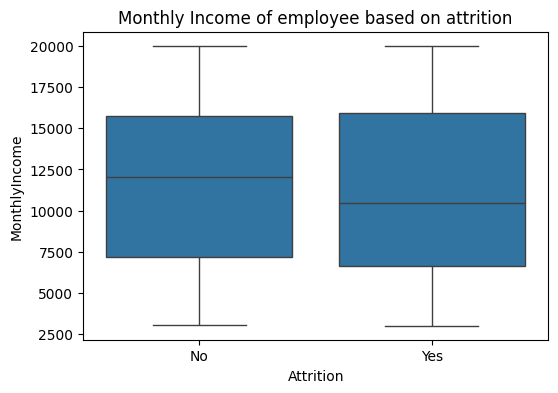

In [150]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Monthly Income of employee based on attrition")

 5. Does job satisfaction affect attrition?

In [24]:
df.groupby(['JobSatisfaction'])['Attrition'].value_counts().unstack()

Attrition,No,Yes
JobSatisfaction,,
1,191,56
2,228,58
3,178,50
4,197,42


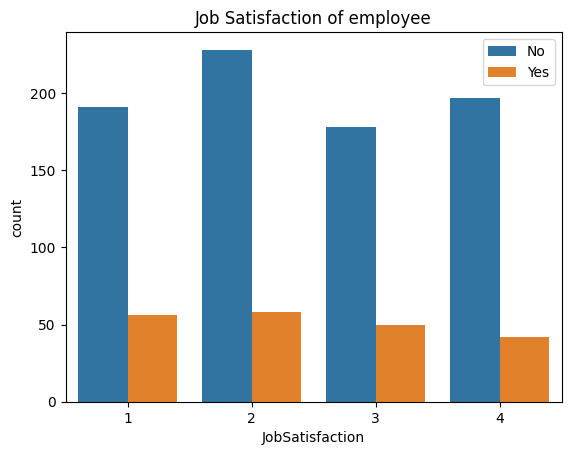

In [166]:
plt.Figure(figsize=(10,5))
sns.countplot(df,x='JobSatisfaction',hue = 'Attrition')
plt.title("Job Satisfaction of employee")
plt.legend(loc='upper right')  
plt.show()

6. What is the attrition trend by age group?

In [161]:
# Creation of age category based on emplopyees age
df['Age_Category']=pd.cut(df['Age'],bins = [18, 30, 40, 50, 65],labels =['Young Adult', 'Mid-Age Adult', 'Senior Adult', 'Pre-Retirement'])

In [162]:
age_attrition = df.groupby(['Age_Category'])['Attrition'].value_counts(normalize=True).unstack()
age_attrition['Attrition_rate'] = age_attrition['Yes'] * 100


C:\Users\premm\AppData\Local\Temp\ipykernel_20948\4182437771.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_attrition = df.groupby(['Age_Category'])['Attrition'].value_counts(normalize=True).unstack()


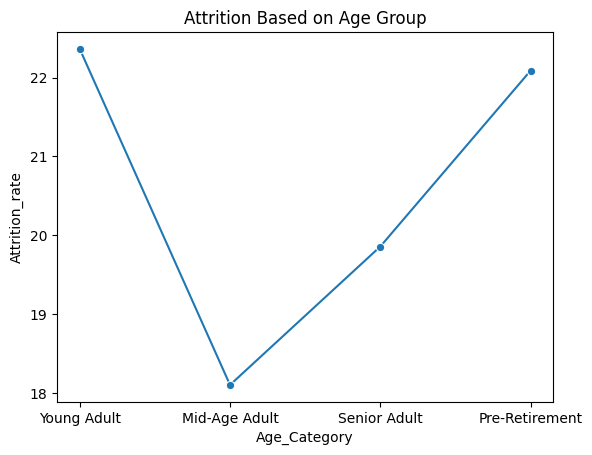

In [180]:
sns.lineplot(age_attrition,x='Age_Category',y = "Attrition_rate",marker = 'o')
plt.title("Attrition Based on Age Group")
plt.show()

7. How does distance from home influence attrition?

In [71]:
df.groupby(['Attrition'])['DistanceFromHome'].sum()

Attrition
No     11810
Yes     3131
Name: DistanceFromHome, dtype: int64

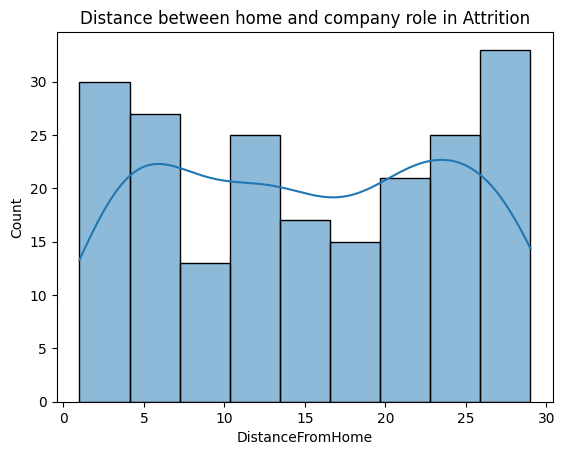

In [179]:
sns.histplot(data = df[df['Attrition'] == 'Yes'], x='DistanceFromHome',kde=True,label = 'yes')
plt.title("Distance between home and company role in Attrition")
plt.show()

 8. Which job roles have the highest attrition rates?

In [96]:
attrition_on_job = df.groupby(['JobRole'])['Attrition'].value_counts().unstack()
attrition_on_job

Attrition,No,Yes
JobRole,,
Financial Analyst,107,25
HR Executive,108,19
Lab Technician,109,31
Manager,97,25
Research Scientist,81,21
Sales Executive,106,30
Software Developer,101,23
Technical Lead,85,32


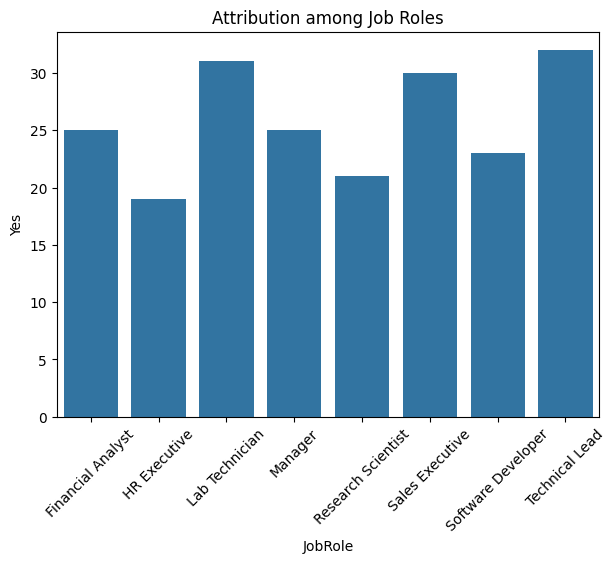

In [173]:
plt.figure(figsize=(7,5))
sns.barplot(attrition_on_job,x = 'JobRole',y = 'Yes')
plt.xticks(rotation=45) 
plt.title('Attribution among Job Roles')
plt.show()

9. What is the correlation between numerical features and attrition?


<Axes: >

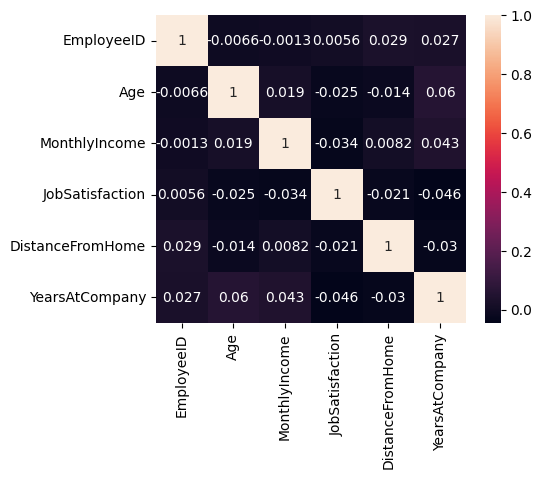

In [ ]:
plt.figure(figsize=(5,4))
corr = df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)

10. How many years at company before employees tend to leave?

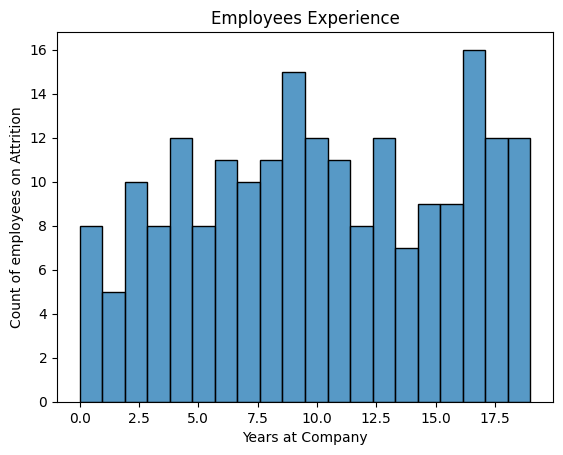

In [177]:
sns.histplot(df[df['Attrition'] == 'Yes'],x = 'YearsAtCompany',bins = 20)
plt.title("Employees Experience")
plt.ylabel("Count of employees on Attrition")
plt.xlabel("Years at Company")
plt.show()